# Assignment Brief de UNIT 19 - DATA STRUCTURES & ALGORITHMS

**Autor: Rubén Valverde Romero**

### Definir los tipos de datos básicos con los que trabajaremos en el AB.

### Tipos de datos empleados en el proyecto

1. lista: Representa una secuencia de nodos o vértices del grafo.

    - Ejemplo: vertices = ['A', 'B', 'C']

2. diccionario: Representa un mapa de adyacencia entre los nodos del grafo.


    - Ejemplo: grafo = {'A': ['B', 'C'], 'B': ['A', 'D'], 'C': ['A', 'F'], 'D': ['B'], 'E': ['F'], 'F': ['C', 'E']}

3. set: Representa un conjunto de nodos o vértices del grafo.


    - Ejemplo: vertices = {'A', 'B', 'C'}

4. tupla: Similar a la lista, pero inmutable.


    - Ejemplo: vertices = ('A', 'B', 'C')

5. numpy.ndarray: Representa una matriz de adyacencia entre los nodos del grafo. Tienen la misma función que los arrays normales pero son más veloces y facilitan los calculos con diversas funciones.


    - Ejemplo: grafo = np.array([[0, 1, 0], [1, 0, 1], [0, 1, 0]])


#### Creación de una Matriz de adyacencia y representación gráfica del grafo

Se utlizará para medir la velocidad de distintos algoritmos

In [99]:
# Importar librerias
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import random
from scipy.sparse import csr_matrix
from scipy.sparse.csgraph import dijkstra
from scipy.sparse.csgraph import bellman_ford

In [121]:
# Crea una gráfica vacía
G = nx.Graph()

# Agrega 20 nodos a la gráfica
for i in range(14):
    G.add_node(i)

# Añade aristas a la gráfica
G.add_edge(0, 3)
G.add_edge(3, 6)
G.add_edge(6, 9)
G.add_edge(9, 10)
G.add_edge(0, 2)
G.add_edge(2, 5)
G.add_edge(5, 8)
G.add_edge(8, 10)
G.add_edge(0, 1)
G.add_edge(1, 4)
G.add_edge(4, 7)
G.add_edge(7, 10)
G.add_edge(3, 6)
G.add_edge(6, 9)
G.add_edge(9, 13)
G.add_edge(13, 10)
G.add_edge(12, 9)
G.add_edge(12, 11)
G.add_edge(11, 10)

# Calcula la matriz de adyacencia actualizada
matriz_adyacencia = nx.to_numpy_array(G)

# Asigna pesos aleatorios a las aristas
matriz_adyacencia[matriz_adyacencia == 1] = np.random.randint(1, 7, size=np.count_nonzero(matriz_adyacencia == 1))
matriz_adyacencia[matriz_adyacencia == 0] = np.random.randint(30, 45, size=np.count_nonzero(matriz_adyacencia == 0))
np.fill_diagonal(matriz_adyacencia, 0)
print(matriz_adyacencia)
matriz_adyacencia = csr_matrix(matriz_adyacencia)

[[ 0.  4.  1.  3. 38. 37. 30. 33. 39. 43. 44. 40. 35. 36.]
 [ 2.  0. 39. 34.  3. 35. 32. 38. 43. 33. 33. 33. 30. 36.]
 [ 3. 31.  0. 32. 32.  3. 39. 38. 33. 43. 37. 34. 34. 33.]
 [ 1. 31. 30.  0. 32. 34.  2. 30. 35. 33. 43. 33. 43. 44.]
 [41.  2. 44. 35.  0. 37. 34.  4. 35. 31. 34. 35. 37. 31.]
 [37. 30.  4. 30. 43.  0. 36. 41.  3. 31. 38. 35. 43. 42.]
 [35. 35. 30.  6. 37. 31.  0. 31. 39.  4. 33. 38. 40. 42.]
 [35. 32. 35. 40.  1. 41. 34.  0. 31. 40.  3. 39. 38. 34.]
 [31. 34. 37. 44. 40.  4. 32. 33.  0. 44.  2. 35. 34. 30.]
 [33. 39. 36. 38. 39. 41.  3. 43. 43.  0.  4. 39.  1.  5.]
 [43. 40. 31. 33. 43. 41. 39.  5.  6.  5.  0.  6. 41.  2.]
 [31. 43. 35. 44. 32. 43. 37. 41. 43. 34.  5.  0.  1. 38.]
 [35. 42. 41. 33. 32. 31. 38. 43. 38.  5. 43.  4.  0. 41.]
 [36. 37. 38. 37. 38. 40. 32. 44. 44.  5.  1. 39. 31.  0.]]


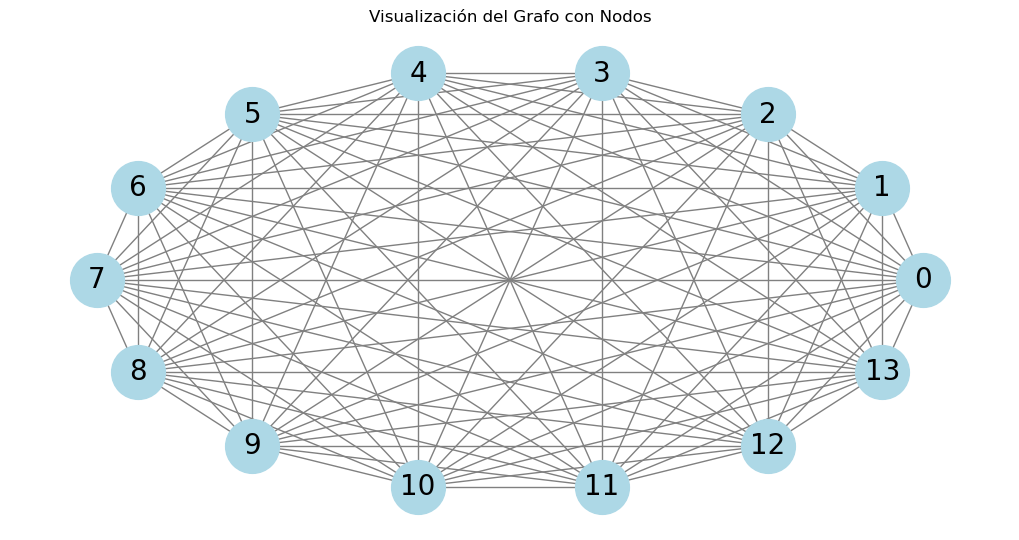

In [122]:
# Crear un grafo desde la matriz de adyacencia
G = nx.from_numpy_array(matriz_adyacencia)

# Dibujar el grafo con nodos en forma de elipse
plt.figure(figsize=(10, 5))

# Número de nodos
num_nodos = len(G.nodes)

# Calcular las posiciones en forma de elipse
pos = {}
for i in range(num_nodos):
    angle = 2 * np.pi * i / num_nodos
    x = np.cos(angle)  
    y = np.sin(angle)
    pos[i] = (x, y)

nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=1500, font_size=20)
plt.title("Visualización del Grafo con Nodos")
plt.show()

### Algoritmos de ruta más corta

#### Dijkstra

##### Características:
1. **Aplicabilidad**: Funciona en grafos dirigidos y no dirigidos.
2. **Pesos Positivos**: Solo funciona con grafos que tienen pesos no negativos en las aristas.
3. **Complejidad Temporal**: Tiene una complejidad temporal de $(O(V^2))$ para una implementación simple, donde $(V)$ es el número de vértices. Con estructuras de datos más avanzadas como montículos binarios, la complejidad puede reducirse a $(O((V + E) \log V))$, donde $(E)$ es el número de aristas.
4. **Distancias Mínimas**: Calcula las distancias mínimas desde un nodo origen a todos los demás nodos.
5. **No Detección de Ciclos Negativos**: No puede manejar grafos con pesos negativos en las aristas.

##### Pasos:

1. **Inicialización**:
    - Establece la distancia al nodo origen como 0 y a todos los demás nodos como infinito.
    - Marca todos los nodos como no visitados. Establece el nodo origen como el nodo actual.

2. **Selección del Nodo Actual**:
    - Selecciona el nodo no visitado con la distancia más pequeña como el nodo actual.

3. **Actualización de Distancias**:
    - Para el nodo actual, considera todos sus vecinos no visitados y calcula sus distancias tentativas.
    - Compara la distancia recién calculada con la distancia actual asignada y asigna el menor valor.

4. **Marcar Nodo como Visitado**:
    - Una vez considerados todos los vecinos del nodo actual, marca el nodo actual como visitado. Un nodo visitado no será revisado nuevamente.

5. **Repetición**:
    - Si el nodo destino ha sido marcado como visitado o si la distancia más pequeña entre los nodos no visitados es infinita, el algoritmo termina.
    - De lo contrario, selecciona el nodo no visitado con la distancia más pequeña, establece este nodo como el nuevo nodo actual y repite el proceso.


**Referencias:**

- M, G.P. (2023) Explicación de algoritmos y estructuras de datos de grafos con Ejemplos en Java y C++. https://www.freecodecamp.org/espanol/news/explicacion-de-algoritmos-y-estructuras-de-datos-de-grafos-con-ejemplos-en-java-y-c/.

- colaboradores de Wikipedia (2024) Algoritmo de Dijkstra. https://es.wikipedia.org/wiki/Algoritmo_de_Dijkstra.

- dijkstra — SciPy v1.14.1 Manual (no date). https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csgraph.dijkstra.html#scipy.sparse.csgraph.dijkstra.




![Dijkstra Animation](./imagenes/Dijkstra_Animation.gif)  
Fuente: [Wikipedia](https://es.wikipedia.org/wiki/Algoritmo_de_Dijkstra)


In [128]:
#%%timeit
# Utiliza el algoritmo de Dijkstra a través de scipy
dist_matrix = dijkstra(matriz_adyacencia, directed=False, indices=0)

print("La distancia mínima entre el nodo 0 y el nodo 13 es:", dist_matrix[13])
print('-------------------------------------------------')
print('Tiempo medio de ejecución: 363 microsegundos')

La distancia mínima entre el nodo 0 y el nodo 13 es: 9.0
-------------------------------------------------
Tiempo medio de ejecución: 363 microsegundos


#### Bellman Ford

##### Características:

1. **Aplicabilidad**: El algoritmo Bellman-Ford se aplica a grafos dirigidos con pesos negativos, ya que no puede manejar aristas con pesos negativos en grafos no dirigidos.
2. **Pesos Negativos**: Puede manejar grafos con pesos negativos en las aristas.
3. **Complejidad Temporal**: Tiene una complejidad temporal de $O(V \cdot E)$, donde $V$ es el número de vértices y $E$ es el número de aristas (este es un límite asintótico que se refiere al peor caso).
4. **Detección de Ciclos Negativos**: Puede detectar la presencia potencial de ciclos de peso negativo en el grafo.
5. **Distancias Mínimas**: Calcula las distancias mínimas desde un nodo origen a todos los demás nodos, siempre y cuando no haya ciclos de peso negativo.

#### Pasos:

**1: Inicialización**

* Se selecciona un nodo origen en el grafo.
* Se establece la distancia al nodo origen como $0$, y se establecen las distancias a todos los demás nodos como infinito (representado por un valor muy grande).

**2: Relajación de aristas**

* El algoritmo repite el siguiente proceso $V-1$ veces, donde $V$ es el número de vértices en el grafo.
* Para cada vértice $v$:
	+ Se revisan todas las aristas incidentes en $v$, es decir, aquellas que comienzan o terminan en $v$.
	+ Para cada arista $(u,v)$ con peso $w$:
		- Si la distancia actual a $u$ más el peso de la arista $w$ es menor que la distancia actual a $v$, se actualiza la distancia a $v$.

**3: Detección de ciclos negativos**

* Después de $V-1$ iteraciones de relaxación de aristas, se revisan todas las aristas una vez más.
* Para cada arista $(u,v)$ con peso $w$:
	+ Si la distancia actual a u más el peso de la arista w es menor que la distancia actual a $v$, significa que hay un ciclo negativo en el grafo.
	+ En este caso, el algoritmo indica la presencia de un ciclo negativo y no puede garantizar la corrección de las distancias mínimas.

**4: Resultado**

* Si no se detecta ningún ciclo negativo después de $V-1$ iteraciones de relaxación de aristas más una última revisión, el algoritmo ha encontrado las distancias mínimas desde el nodo origen a todos los demás nodos en el grafo.
* Las distancias mínimas están almacenadas en la matriz de distancias, que es una tabla que contiene la distancia mínima desde el nodo origen a cada vértice en el grafo.

**Ventajas del algoritmo de Bellman-Ford resoecto al Dijkstra**

* Puede manejar grafos con ciclos negativos.
* Es más robusto que el algoritmo de Dijkstra, ya que puede detectar ciclos negativos y evitar la propagación de distancias incorrectas.
* Tiene una complejidad temporal de $O(VE)$, donde $E$ es el número de aristas en el grafo.

**Referencias:**
- Jariasf (2013) CAMINO MAS CORTO: ALGORITMO DE BELLMAN-FORD. https://jariasf.wordpress.com/2013/01/01/camino-mas-corto-algoritmo-de-bellman-ford/.

- M, G.P. (2023) Explicación de algoritmos y estructuras de datos de grafos con Ejemplos en Java y C++. https://www.freecodecamp.org/espanol/news/explicacion-de-algoritmos-y-estructuras-de-datos-de-grafos-con-ejemplos-en-java-y-c/.

- bellman_ford — SciPy v1.14.1 Manual (no date). https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csgraph.bellman_ford.html#scipy.sparse.csgraph.bellman_ford.


In [130]:
#%%timeit
from scipy.sparse.csgraph import bellman_ford

# Utiliza el algoritmo de Bellman-Ford a través de scipy
dist_matrix = bellman_ford(matriz_adyacencia, directed=False, indices=0, return_predecessors=False)

print("La distancia mínima entre el nodo 0 y el nodo 13 es:", dist_matrix[13])
print('-------------------------------------------------')
print('Tiempo de ejecución: 163 microsegundos')

La distancia mínima entre el nodo 0 y el nodo 13 es: 9.0
-------------------------------------------------
Tiempo de ejecución: 163 microsegundos
